# `In this file I will try to implement part b using a single layer neural network`

In [1]:
# Package imports
import numpy as np
import sklearn
import sklearn.linear_model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(777)


### Splits the data into train val and test 

In [2]:
# splits the data into train, val, test

def split_stratified_into_train_val_test(df_input, stratify_colname='y',
                                         frac_train=0.6, frac_val=0.15, frac_test=0.25,
                                         random_state=None):


    X = df_input.drop(columns=[stratify_colname]) 
    y = df_input[[stratify_colname]]

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(X,
                                                          y,
                                                          stratify=y,
                                                          test_size=(
                                                              1.0 - frac_train),
                                                          random_state=random_state)

    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(df_temp,
                                                      y_temp,
                                                      stratify=y_temp,
                                                      test_size=relative_frac_test,
                                                      random_state=random_state)


    return df_train, df_val, df_test, y_train, y_val, y_test


### Encode each class of column bus with a unique int


In [3]:
import pandas as pd
np.random.seed(777)
df = pd.read_csv('..//Data//Vehicles.csv', header=None)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,100,36,73,199,73,6,162,40,20,127,189,401,125,72,6,19,200,204,bus
1,91,36,72,162,60,8,150,44,19,133,166,334,121,63,2,22,196,205,saab
2,91,41,64,148,61,8,129,51,18,142,161,249,153,68,6,12,194,201,van
3,86,39,58,125,55,5,117,57,17,134,140,204,148,69,7,6,190,194,van
4,95,53,95,202,65,10,193,34,22,160,220,559,237,71,3,2,188,196,saab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,80,37,57,116,55,6,125,54,18,125,142,229,132,81,8,5,178,184,opel
842,104,55,107,222,68,11,218,31,24,173,232,703,229,71,3,10,188,199,saab
843,94,38,84,158,55,9,169,39,20,130,196,430,155,69,9,15,190,195,opel
844,104,52,100,191,59,9,197,33,23,158,218,583,234,70,10,10,191,198,saab


In [4]:
scaler = preprocessing.StandardScaler().fit(df[df.columns[:-1]])
results = scaler.transform(df[df.columns[:-1]])
df[df.columns[:-1]] = results
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.768143,-1.437137,-0.576610,0.898564,1.434137,-0.558308,-0.205844,-0.119612,-0.224944,-1.447489,0.011942,-0.220351,-1.528051,-0.061767,-0.076711,0.717089,1.796563,1.125526,bus
1,-0.325470,-1.437137,-0.640053,-0.207486,-0.214858,-0.123383,-0.567015,0.392752,-0.610954,-1.033897,-0.721096,-0.599765,-1.651025,-1.264566,-0.890472,1.053187,1.147244,1.260036,saab
2,-0.325470,-0.626268,-1.147596,-0.625991,-0.088012,-0.123383,-1.199063,1.289390,-0.996965,-0.413510,-0.880452,-1.081111,-0.667235,-0.596344,-0.076711,-0.067140,0.822585,0.721997,van
3,-0.933032,-0.950615,-1.528254,-1.313535,-0.849087,-0.775770,-1.560233,2.057937,-1.382975,-0.964965,-1.549747,-1.335941,-0.820952,-0.462700,0.126729,-0.739337,0.173267,-0.219572,van
4,0.160580,1.319820,0.819133,0.988243,0.419371,0.311542,0.727179,-0.888159,0.547076,0.827264,0.999950,0.674386,1.915215,-0.195411,-0.687032,-1.187468,-0.151393,0.049447,saab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-1.662107,-1.274963,-1.591697,-1.582574,-0.849087,-0.558308,-1.319453,1.673664,-0.996965,-1.585352,-1.486005,-1.194369,-1.312847,1.141032,0.330170,-0.851370,-1.774689,-1.564671,opel
842,1.254193,1.644168,1.580448,1.586108,0.799908,0.529004,1.479617,-1.272432,1.319096,1.723379,1.382404,1.489843,1.669268,-0.195411,-0.687032,-0.291206,-0.151393,0.452977,saab
843,0.039068,-1.112789,0.121261,-0.327059,-0.849087,0.094079,0.004838,-0.247703,-0.224944,-1.240693,0.235041,-0.056127,-0.605748,-0.462700,0.533610,0.268958,0.173267,-0.085062,opel
844,1.254193,1.157646,1.136348,0.659418,-0.341704,0.094079,0.847569,-1.016250,0.933086,0.689401,0.936207,0.810296,1.822985,-0.329056,0.737051,-0.291206,0.335596,0.318467,saab


Encode cat variables


In [5]:
print(df[18].unique())
df[18] = pd.factorize(df[18])[0]
df[18]


['bus' 'saab' 'van' 'opel']


0      0
1      1
2      2
3      2
4      1
      ..
841    3
842    1
843    3
844    1
845    2
Name: 18, Length: 846, dtype: int64

In [6]:
X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(df, stratify_colname=18,
                                                                                      frac_train=0.7, frac_val=0.15, frac_test=0.15,
                                                                                      random_state=None)
X_train, X_val, X_test, y_train, y_val, y_test = X_train.T.to_numpy(), X_val.T.to_numpy(
), X_test.T.to_numpy(), y_train.T.to_numpy(), y_val.T.to_numpy(), y_test.T.to_numpy()
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((18, 592), (18, 127), (18, 127), (1, 592), (1, 127), (1, 127))

In [7]:
trainx, valx, testx, trainy,valy,testy = X_train.T, X_val.T, X_test.T, y_train.T, y_val.T, y_test.T
trainx.shape, valx.shape,testx.shape, trainy.shape, valy.shape, testy.shape

((592, 18), (127, 18), (127, 18), (592, 1), (127, 1), (127, 1))

In [8]:
def model_architecture(X, Y):
    n_x = X.shape[1]
    n_h = len(np.unique(Y))
    n_y = 1
    return (n_x, n_h, n_y)


In [9]:
def initialize_parameters(n_x, n_h, n_y):

    W = np.random.randn(n_x, n_h) * 0.01
    b = np.zeros((1, n_h))
  

    return W,b


In [10]:
def softmax(x):
    exp_scores = np.exp(x)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return probs

In [11]:
def cross_entropy_loss(probs, y):
    correct_logprobs = -np.log(probs[range(y.shape[0]),y])
    return np.sum(correct_logprobs)/y.shape[0]

In [12]:
def forward_propagation(X, parameters):

    W,b = parameters
    Z1 = np.dot(X, W) + b
    A1 = softmax(Z1)
    
    cache = A1,Z1
    return A1, cache


In [13]:
def compute_loss(A1, Y):
    loss = cross_entropy_loss(A1, Y)
    return loss


In [14]:
def backprop(parameters, cache, X, Y):
    W,b = parameters
    A1 = cache[0]
    dscores = A1
    dscores[range(Y.shape[0]),Y] -= 1
    dscores /= Y.shape[0]
    dW= np.dot(X.T, dscores)
    db= np.sum(dscores, axis=0, keepdims=True)
    

    grads = dW, db
    return grads


In [15]:
def update(parameters, grads, learning_rate=0.01):
#
    W,b = parameters
 
    dW, db = grads

    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    
    parameters = W,b

    return parameters


In [16]:
def NeuralNetwork(X, Y, n_h, num_iterations=1000, learning_rate=0.5, print_loss=False):

    n_x = model_architecture(X, Y)[0]
    n_y = model_architecture(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_iterations):
        
        A1, cache = forward_propagation(X, parameters)
        loss = compute_loss(A1, Y)
        grads = backprop(parameters, cache, X, Y)
        parameters = update(parameters, grads)

        # Print the loss every 100 iterations
        if print_loss and i % 100 == 0:
            print("loss after iteration %i: %f" % (i, loss))

    return parameters


In [17]:
def predict(parameters, X):

    A1, cache = forward_propagation(X, parameters)
    predictions = np.argmax(A1, axis=1)

    return predictions


In [18]:
parameters = NeuralNetwork(trainx, trainy, 4, num_iterations = 1000, learning_rate = 0.1, print_loss=True)

loss after iteration 0: 821.178217
loss after iteration 100: 820.809167
loss after iteration 200: 820.749718
loss after iteration 300: 820.726835
loss after iteration 400: 820.716036
loss after iteration 500: 820.709945
loss after iteration 600: 820.705964
loss after iteration 700: 820.703081
loss after iteration 800: 820.700855
loss after iteration 900: 820.699070


### Prediction on the training set

In [19]:
predictions = predict(parameters, trainx)
predictions
accuracy_score(trainy, predictions)


0.18243243243243243

### Prediction on the validation set

In [20]:
predictions = predict(parameters, valx)
predictions
accuracy_score(valy, predictions)


0.2125984251968504

### Combine training and validation sets and re-train

In [21]:
train_val_x = np.concatenate((valx,trainx))
train_val_y = np.concatenate((valy,trainy))
parameters = NeuralNetwork(trainx, trainy, 4, num_iterations = 10000, learning_rate = 0.1, print_loss=True)

loss after iteration 0: 821.155776
loss after iteration 100: 820.822344
loss after iteration 200: 820.751820
loss after iteration 300: 820.723882
loss after iteration 400: 820.711227
loss after iteration 500: 820.704777
loss after iteration 600: 820.701106
loss after iteration 700: 820.698800
loss after iteration 800: 820.697226
loss after iteration 900: 820.696074
loss after iteration 1000: 820.695184
loss after iteration 1100: 820.694465
loss after iteration 1200: 820.693864
loss after iteration 1300: 820.693350
loss after iteration 1400: 820.692902
loss after iteration 1500: 820.692505
loss after iteration 1600: 820.692151
loss after iteration 1700: 820.691832
loss after iteration 1800: 820.691544
loss after iteration 1900: 820.691281
loss after iteration 2000: 820.691041
loss after iteration 2100: 820.690822
loss after iteration 2200: 820.690620
loss after iteration 2300: 820.690434
loss after iteration 2400: 820.690262
loss after iteration 2500: 820.690103
loss after iteration 260

### Prediction on the test set

In [22]:
predictions = predict(parameters, testx)
predictions
accuracy_score(testy, predictions)


0.25196850393700787

### Confusion matrix

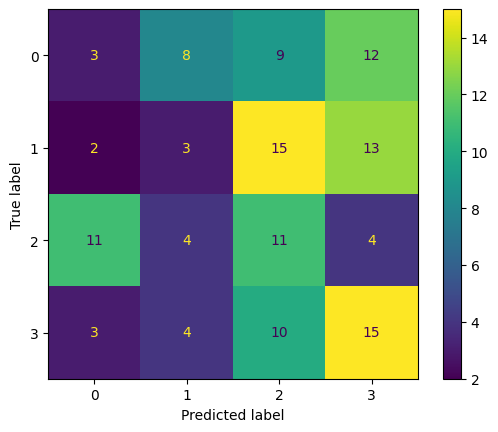

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion = confusion_matrix(testy, predictions)
ConfusionMatrixDisplay(confusion).plot()


# Interperting the poor accuracy

### As can be observed the data distribution is highly complex, and hence, very difficult to be learned via a single layer

In [24]:
import umap 
import plotly.express as px
reducer = umap.UMAP(n_components=2)
reduction = reducer.fit_transform(df[df.columns[:18]])
comp1, comp2 = reduction[:,0], reduction[:,1]

px.scatter(x=comp1, y=comp2, color=df[18].astype(str))

c:\Users\walee\OneDrive\ICS471_Assignments\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
